In [33]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Custom module imports
import wrangle as w

# Regression Wrangling Exercises
---

## Exercises I
---

Let's review the steps we take at the beginning of each new module.

1. Create a new repository named `regression-exercises` in your GitHub; all of your Regression work will be housed here.
1. Clone this repository within your local `codeup-data-science` directory.
1. Create a `.gitignore` and make sure your list of 'files to ignore' includes your `env.py` file.
1. Ceate a `README.md` file that outlines the contents and purpose of your repository.
1. Add, commit, and push these two files.
1. Now you can add your `env.py` file to this repository to access the Codeup database server.
1. For these exercises, you will create `wrangle.ipynb` and `wrangle.py` files to hold necessary functions.
1. As always, add, commit, and push your work often.
---

## Exercises II
---

### 1.

Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.

In [63]:
df = w.get_zillow_sfr_data()

### 2.

Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

#### Summarize

In [64]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


**Takeaways**
- Lot of null values already being seen
- fips got messed up and needs to be changed back to 06037 and string dtype

In [65]:
df.shape

(2152863, 7)

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


**Takeaways**
- 25 bedrooms seems too high
- 32 bathrooms seems too high
- 1 sqft seems too low
- 952,000 sqft seems too high
- house built in 1801?
    - Should this be changed to different dtype or kept as float?
- All columns are missing values except fips

In [67]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 131.4 MB


**Takeaways**
- All floats?
    - Should we convert some to ints?

#### Prepare/Clean

In [68]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [69]:
# let's drop all nulls since there aren't many compared to size of df
df = df.dropna()

In [70]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

##### fips

In [71]:
df.fips.value_counts()

6037.0    1425207
6059.0     552057
6111.0     162971
Name: fips, dtype: int64

- There are no nulls
- There are only 3 values represented (makes sense)
- Only issue I see so far is the dtype and leading 0 being dropped

In [72]:
df.fips = '0' + df.fips.astype('int').astype('string')

In [73]:
df.fips.value_counts()

06037    1425207
06059     552057
06111     162971
Name: fips, dtype: Int64

##### visualize numerical columns

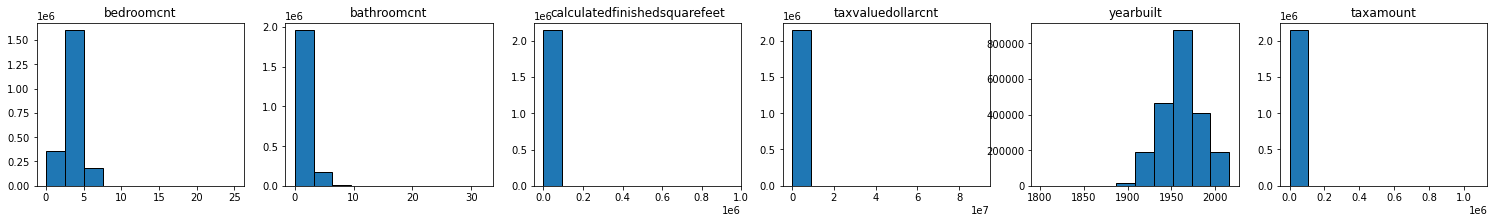

In [74]:
# bar charts
plt.figure(figsize=(26, 3))

# List of columns
cols = df.select_dtypes('number').columns.tolist()

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,6, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

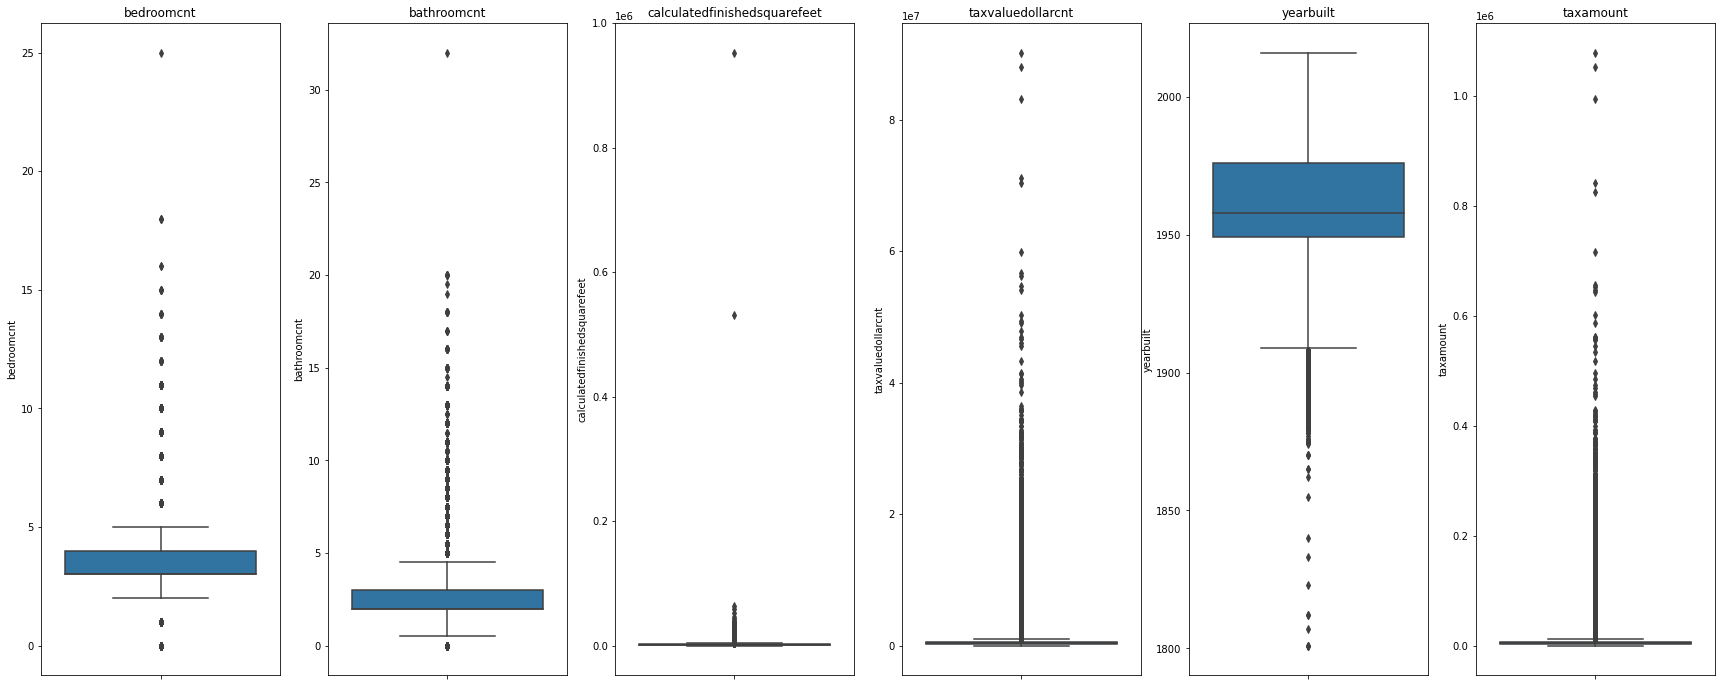

In [75]:
# boxplots
plt.figure(figsize=(30, 12))

# List of columns
num_cols = df.select_dtypes('number').columns.tolist()

for i, col in enumerate(num_cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,6, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display boxplot for column.
    sns.boxplot(y=col, data=df)

**Takeaways**
- There are a lot of outliers in this dataset
    - I will drop anything outside of the whiskers of these boxplots (Q1 – 1.5*IQR and Q3 + 1.5*IQR)

Create a for loop that drops all data points outside whiskers for all numerical columns

In [76]:
# try John's function
df = remove_outliers(df, 1.5, num_cols)

In [77]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [79]:
df.shape

(1799432, 7)

In [15]:
df.bedroomcnt.median()

3.0

In [16]:
# Q1
Q1 = np.percentile(df.bedroomcnt, 25, interpolation='midpoint')
Q1

3.0

In [17]:
# Q3
Q3 = np.percentile(df.bedroomcnt, 75, interpolation='midpoint')
Q3

4.0

In [18]:
# IQR
IQR = Q3 - Q1
IQR

1.0

In [19]:
# upper bound
UB = Q3 + 1.5 * IQR
UB

5.5

In [20]:
# lower bound
LB = Q1 - 1.5 * IQR
LB

1.5

In [59]:
num_cols = df.select_dtypes('number').columns.tolist()
num_cols

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount']

In [22]:
# put together into a for loop
for col in num_cols:
    Q1 = np.percentile(df[col], 25, interpolation='midpoint')
    Q3 = np.percentile(df[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    UB = Q3 + 1.5 * IQR
    LB = Q1 - 1.5 * IQR
    df[col] = df[col][(df[col] < UB) & (df[col] > LB)]

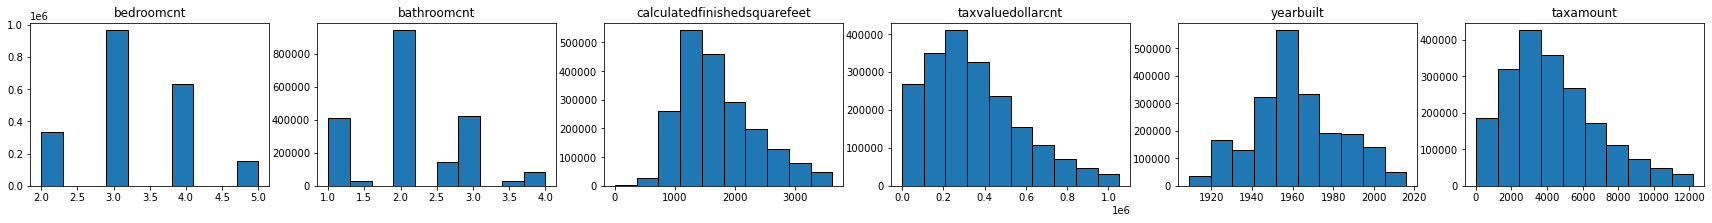

In [24]:
# bar charts
plt.figure(figsize=(30, 3))

# List of columns
cols = df.select_dtypes('number').columns.tolist()

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,6, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

***Looks much better***

In [26]:
df.shape

(2140235, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          string 
dtypes: float64(6), string(1)
memory usage: 130.6 MB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2081444.0,3.288612,0.819289,2.00,3.0000,3.00,4.0000,5.00
bathroomcnt,2061933.0,2.132121,0.773821,1.00,2.0000,2.00,3.0000,4.00
calculatedfinishedsquarefeet,2043909.0,1721.764149,641.997968,1.00,1242.0000,1588.00,2100.0000,3632.00
taxvaluedollarcnt,2002735.0,351670.208291,226087.000536,22.00,179463.0000,308677.00,480865.0000,1052753.00
yearbuilt,2122364.0,1961.452791,21.594223,1909.00,1950.0000,1959.00,1976.0000,2016.00
taxamount,1994624.0,4327.446349,2549.683057,6.34,2424.4775,3875.87,5788.3575,12218.53


In [32]:
df.isnull().sum()

bedroomcnt                       58791
bathroomcnt                      78302
calculatedfinishedsquarefeet     96326
taxvaluedollarcnt               137500
yearbuilt                        17871
taxamount                       145611
fips                                 0
dtype: int64

In [44]:
# sns.pairplot(data=df, hue='fips')

### 3.

Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your `wrangle.py` file. Name your final function `wrangle_zillow`.

In [58]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df